## This script contains the following points:

1. Import libraries and data set.
2. Scale data set.
3. Reduce data set to mean temperatures and single year for analysis.
4. Plot 3D visualization for all weather stations and for Madrid in 2019.
7. Compute loss and gradient descent function for Madrid in 2019.
8. Compute loss and gradient descent for Roma in 1961.
9. Compute loss and gradient descent for Ljubljana in 2009.
10. Plot 3D visualization for all weather stations in 1961 and 2009.

### 1. Importing libraries and data set.

In [1]:
# Import libraries.

import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
# Establish path.

path = r'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 1'
path

'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 1'

In [3]:
# Import data set.

df = pd.read_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)
df

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7               2.1            0.85   
1      19600102      1                  6               2.1            0.84   
2      19600103      1                  8               2.1            0.90   
3      19600104      1                  3               2.1            0.92   
4      19600105      1                  6               2.1            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1               2.1            0.79   
22946  20221028     10                  6               2.1            0.77   
22947  20221029     10                  4               2.1            0.76   
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                     0             0.7  ...                     5   
1                     0             1.1  ...                     7   
2                     0             0.0  ...                     7   
3                     0             4.1  ...                     7   
4                     0             5.4  ...                     3   
...                 ...             ...  ...                   ...   
22945                 0             7.7  ...                     5   
22946                 0             5.4  ...                     5   
22947                 0             6.1  ...                     5   
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0                   0.88             1.0003                       0.45   
1                   0.91             1.0007                       0.25   
2                   0.91             1.0096                       0.17   
3                   0.86             1.0184                       0.13   
4                   0.80             1.0328                       0.46   
...                  ...                ...                        ...   
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                        0.34                    0                4.7   
1                        0.84                    0                0.7   
2                        0.08                    0                0.1   
3                        0.98                    0                0.0   
4                        0.00                    0                5.7   
...                       ...                  ...   

### 2. Scale data set.

In [4]:
# Examine data types in dataframe.

df.dtypes

DATE                     int64
MONTH                    int64
BASEL_cloud_cover        int64
BASEL_wind_speed       float64
BASEL_humidity         float64
                        ...   
VALENTIA_snow_depth      int64
VALENTIA_sunshine      float64
VALENTIA_temp_mean     float64
VALENTIA_temp_min      float64
VALENTIA_temp_max      float64
Length: 170, dtype: object

In [5]:
# Convert DATE column to datetime.

df["DATE"] = df["DATE"].apply(pd.to_datetime, format = '%Y%m%d')

In [6]:
# Check dataframe.

df

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0     1960-01-01      1                  7               2.1            0.85   
1     1960-01-02      1                  6               2.1            0.84   
2     1960-01-03      1                  8               2.1            0.90   
3     1960-01-04      1                  3               2.1            0.92   
4     1960-01-05      1                  6               2.1            0.95   
...          ...    ...                ...               ...             ...   
22945 2022-10-27     10                  1               2.1            0.79   
22946 2022-10-28     10                  6               2.1            0.77   
22947 2022-10-29     10                  4               2.1            0.76   
22948 2022-10-30     10                  5               2.1            0.80   
22949 2022-10-31     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                     0             0.7  ...                     5   
1                     0             1.1  ...                     7   
2                     0             0.0  ...                     7   
3                     0             4.1  ...                     7   
4                     0             5.4  ...                     3   
...                 ...             ...  ...                   ...   
22945                 0             7.7  ...                     5   
22946                 0             5.4  ...                     5   
22947                 0             6.1  ...                     5   
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0                   0.88             1.0003                       0.45   
1                   0.91             1.0007                       0.25   
2                   0.91             1.0096                       0.17   
3                   0.86             1.0184                       0.13   
4                   0.80             1.0328                       0.46   
...                  ...                ...                        ...   
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                        0.34                    0                4.7   
1                        0.84                    0                0.7   
2                        0.08                    0                0.1   
3                        0.98                    0                0.0   
4                        0.00                    0                5.7   
...                       ...             

In [7]:
# Get list of columns that are not dates for scaling.

df_scaling = [x for x in df.columns if "_" in x]
df_scaling

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [8]:
columns = ['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']

In [9]:
# Create scaler object using StandardScaler from sklearn.preprocessing. Note: StandardScaler was selected as opposed to MinMaxScaler given that the dataset was provided by CareerFoundry with presumed normal distribution.

scaler = StandardScaler()

In [10]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[df_scaling]), columns = columns)
df_scaled

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0               0.660514          -0.02793        0.826097       -0.001949   
1               0.244897          -0.02793        0.735760       -0.001949   
2               1.076130          -0.02793        1.277781       -0.001949   
3              -1.001953          -0.02793        1.458455       -0.001949   
4               0.244897          -0.02793        1.729466       -0.001949   
...                  ...               ...             ...             ...   
22945          -1.833187          -0.02793        0.284075        1.037367   
22946           0.244897          -0.02793        0.103401        0.976231   
22947          -0.586336          -0.02793        0.013064        0.716402   
22948          -0.170720          -0.02793        0.374412        0.487141   
22949          -0.170720          -0.02793        0.735760        0.196744   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                   -1.101066            -0.265148         -0.179228   
1                   -1.058108             1.658760         -0.179228   
2                   -1.251420             0.155707         -0.179228   
3                   -0.821838            -0.445514         -0.179228   
4                   -0.746661            -0.164944         -0.179228   
...                       ...                  ...               ...   
22945               -0.005632            -0.004619         -0.179228   
22946               -0.005632            -0.004619         -0.179228   
22947               -0.005632            -0.004619         -0.179228   
22948               -0.005632            -0.004619         -0.179228   
22949               -0.005632            -0.004619         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
0           -0.902918        -0.528623       -0.845652  ...   
1           -0.810126        -0.582946       -0.462450  ...   
2           -1.065304        -0.257010       -0.186545  ...   
3           -0.114186        -0.555784       -0.385810  ...   
4            0.187388        -1.003946       -1.075573  ...   
...               ...              ...             ...  ...   
22945        0.720943         0.747959        0.779123  ...   
22946        0.187388         0.856604        1.223637  ...   
22947        0.349774         0.856604        1.039701  ...   
22948        0.280180         0.680055        0.809780  ...   
22949       -0.322968         0.422023        0.549202  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                 -0.443701           0.761754          -1.299744   
1                  0.783085           1.183580          -1.262455   
2                  0.783085           1.183580          -0.432779   
3                  0.783085           0.480538           0.387574   
4                 -1.670486          -0.363113           1.729970   
...                     ...                ...                ...   
22945             -0.443701          -0.081896          -0.003958   
22946             -0.443701          -0.081896          -0.003958   
22947             -0.443701          -0.081896          -0.003958   
22948             -0.443701          -0.081896          -0.003958   
22949             -0.443701          -0.081896          -0.003958   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                      -0.806427               -0.088407            -0.024706   
1                      -1.042055                0.503361            -0.024706   
2                      -1.136306               -0.396127            -0.024706   
3                      -1.183432                0.669056            -0.024706   
4                      -0.794645               -0.490810            -0.024706   
...                          ...                     ...                  ...   
22945                  -0.005290               -0.00

In [11]:
# Add unscaled DATE column from original dataframe to df_scaled.

df_scaled['DATE'] = df['DATE']
df_scaled

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0               0.660514          -0.02793        0.826097       -0.001949   
1               0.244897          -0.02793        0.735760       -0.001949   
2               1.076130          -0.02793        1.277781       -0.001949   
3              -1.001953          -0.02793        1.458455       -0.001949   
4               0.244897          -0.02793        1.729466       -0.001949   
...                  ...               ...             ...             ...   
22945          -1.833187          -0.02793        0.284075        1.037367   
22946           0.244897          -0.02793        0.103401        0.976231   
22947          -0.586336          -0.02793        0.013064        0.716402   
22948          -0.170720          -0.02793        0.374412        0.487141   
22949          -0.170720          -0.02793        0.735760        0.196744   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                   -1.101066            -0.265148         -0.179228   
1                   -1.058108             1.658760         -0.179228   
2                   -1.251420             0.155707         -0.179228   
3                   -0.821838            -0.445514         -0.179228   
4                   -0.746661            -0.164944         -0.179228   
...                       ...                  ...               ...   
22945               -0.005632            -0.004619         -0.179228   
22946               -0.005632            -0.004619         -0.179228   
22947               -0.005632            -0.004619         -0.179228   
22948               -0.005632            -0.004619         -0.179228   
22949               -0.005632            -0.004619         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
0           -0.902918        -0.528623       -0.845652  ...   
1           -0.810126        -0.582946       -0.462450  ...   
2           -1.065304        -0.257010       -0.186545  ...   
3           -0.114186        -0.555784       -0.385810  ...   
4            0.187388        -1.003946       -1.075573  ...   
...               ...              ...             ...  ...   
22945        0.720943         0.747959        0.779123  ...   
22946        0.187388         0.856604        1.223637  ...   
22947        0.349774         0.856604        1.039701  ...   
22948        0.280180         0.680055        0.809780  ...   
22949       -0.322968         0.422023        0.549202  ...   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...                ...   
22945               -0.005560            -0.0247

In [12]:
# Export dataframe as .csv.

df_scaled.to_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'DataSet_scaled.csv'))

### 3. Reduce data set to mean temperatures and single year for analysis.

In [13]:
# Get list of columns that contain mean temperatures.

mean_lst = [x for x in df_scaled.columns if 'mean' in x]
mean_lst

['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']

In [14]:
# Reduce data set to just the mean temperatures.

df_mean_temps = df_scaled[['DATE','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [15]:
# Check data set reduction.

df_mean_temps

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0     1960-01-01        -0.528623           -1.016876           -1.099163   
1     1960-01-02        -0.582946           -1.107669           -1.110927   
2     1960-01-03        -0.257010           -1.084971           -1.063873   
3     1960-01-04        -0.555784           -1.209812           -1.146217   
4     1960-01-05        -1.003946           -1.209812           -1.087400   
...          ...              ...                 ...                 ...   
22945 2022-10-27         0.747959            0.628750           -0.005167   
22946 2022-10-28         0.856604            0.367720           -0.005167   
22947 2022-10-29         0.856604            0.083991           -0.005167   
22948 2022-10-30         0.680055            0.265577           -0.005167   
22949 2022-10-31         0.422023            0.197483           -0.005167   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0             -0.114356             -0.105836         -0.927601   
1             -0.367511             -0.370915         -0.825294   
2             -0.509912             -0.532908         -0.940389   
3             -0.525734             -0.577088         -1.042696   
4             -0.320045             -0.444548         -0.978754   
...                 ...                   ...               ...   
22945          0.898267              1.042841          0.440753   
22946          0.945734              1.278467          0.466330   
22947          0.914089              1.101748          0.786039   
22948          0.692578              0.880848          0.376811   
22949          0.439422              0.659949          0.159409   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0               -0.106469         -0.182904            -1.370824   
1               -0.892676         -0.212437            -1.043881   
2               -0.490837         -0.389635            -0.741156   
3               -0.316124         -0.493001            -0.910682   
4               -0.403481         -0.552067            -0.862246   
...                   ...               ...                  ...   
22945            0.906865         -0.005705             0.481853   
22946            0.802037         -0.005705             0.263891   
22947            0.924336         -0.005705             0.300218   
22948            0.697210         -0.005705             0.397090   
22949            0.435140         -0.005705             0.348654   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
0                 -0.097084         -0.988280           -0.265742   
1                 -0.232112         -0.691740           -0.353714   
2                 -0.487164         -0.853490           -0.403983   
3                 -0.472161         -0.624345           -0.642763   
4                 -0.307127         -0.381721           -0.906678   
...                     ...               ...                 ...   
22945              1.268193          0.683127            0.664244   
22946              1.313202          0.561815            0.890456   
22947              1.208181          0.548336            1.053832   
22948              0.923123          0.103526            0.689378   
22949              0.773092         -0.112140            0.488300   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0           -0.186575       -1.280450            -0.124331   
1           -0.368598       -0.539569            -0.650834   
2           -0.550620       -0.876333            -0.650834   
3           -0.417137       -0.775304            -0.943336   
4           -0.332193       -0.926848            -0.621584   
...               ...             ...                  ...   
22945        0.395898       -0.000746             0.826301   
22946        0.541516       -0.000746             1.074927   
22947        0.395898       -0.000746             1.221178   
22948       -0.0

In [15]:
# Export dataframe as .csv.

df_mean_temps.to_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'DataSet_meantemps_scaled.csv'))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

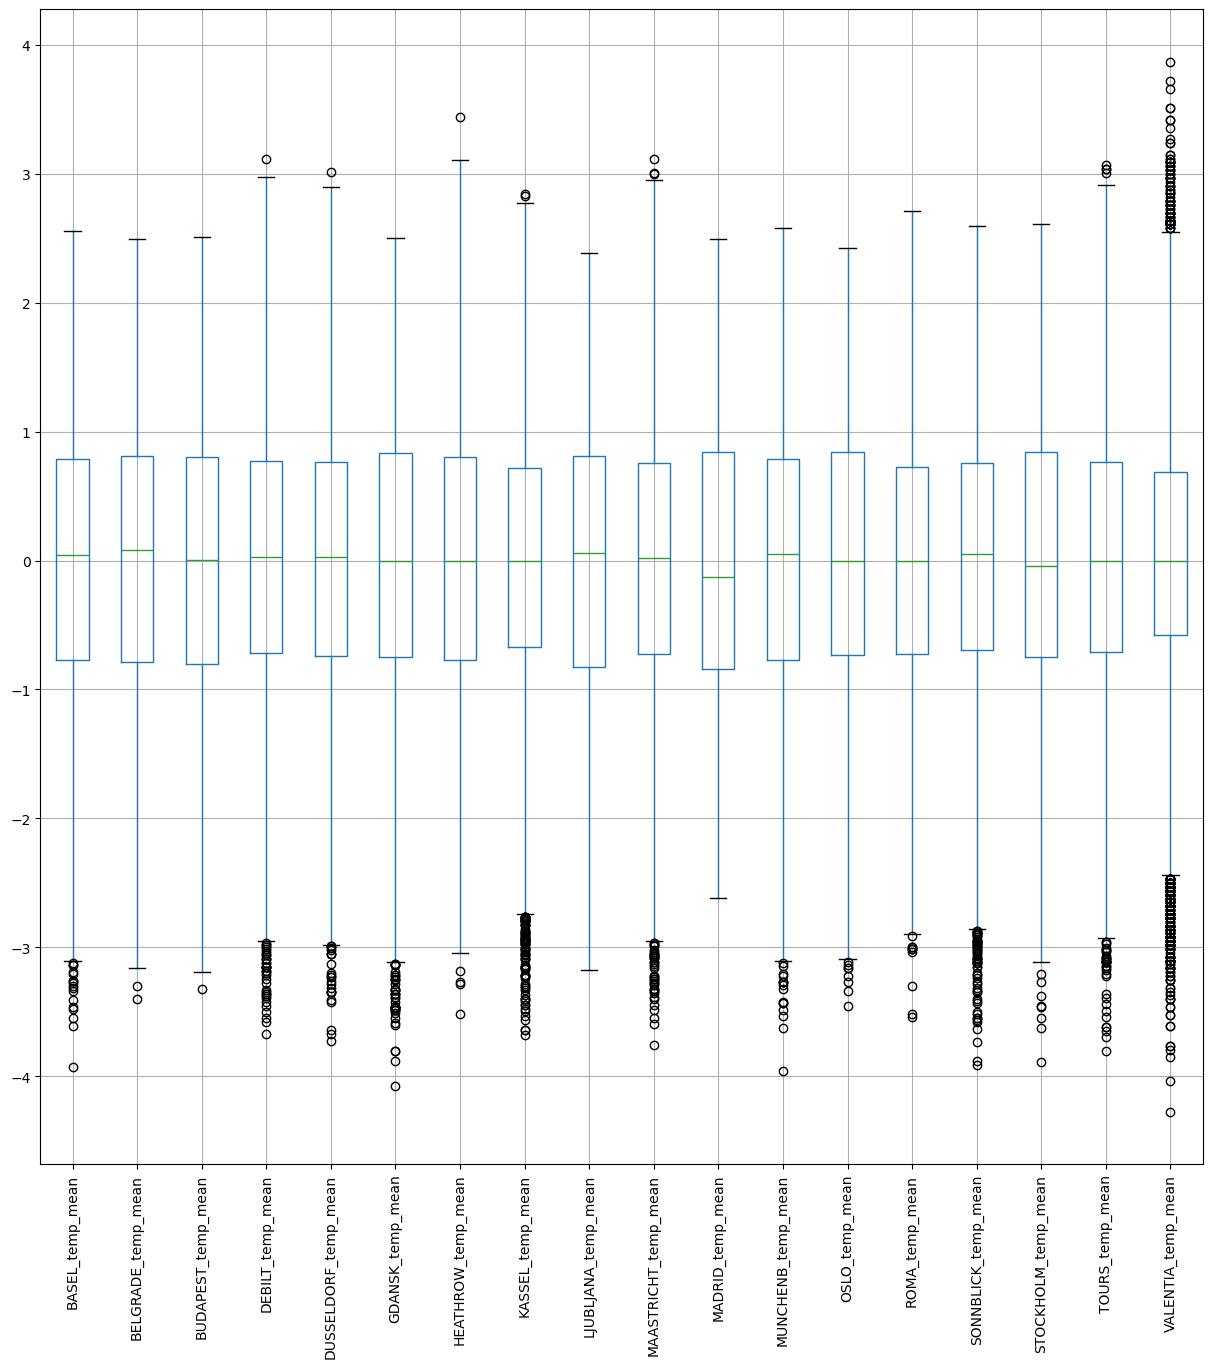

In [16]:
# Examine whisker plot of data to see variations in temperatures.

df_mean_temps.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

In [57]:
# Create subset dataframe for 2019 weather data.

df_subset = df.loc[df["DATE"].dt.year == 2019]
df_subset

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
21550 2019-01-01      1                  6               2.5            0.86   
21551 2019-01-02      1                  7               2.0            0.69   
21552 2019-01-03      1                  3               0.8            0.71   
21553 2019-01-04      1                  4               1.1            0.79   
21554 2019-01-05      1                  8               1.6            0.82   
...          ...    ...                ...               ...             ...   
21910 2019-12-27     12                  8               1.5            0.92   
21911 2019-12-28     12                  7               1.9            0.86   
21912 2019-12-29     12                  6               1.1            0.93   
21913 2019-12-30     12                  1               1.8            0.81   
21914 2019-12-31     12                  5               2.9            0.87   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
21550          1.0333                    0.77                 0.07   
21551          1.0357                    0.33                 0.01   
21552          1.0393                    0.76                 0.00   
21553          1.0382                    0.74                 0.00   
21554          1.0346                    0.50                 0.04   
...               ...                     ...                  ...   
21910          1.0273                    0.15                 0.52   
21911          1.0380                    0.35                 0.00   
21912          1.0387                    0.61                 0.00   
21913          1.0354                    0.64                 0.00   
21914          1.0350                    0.58                 0.00   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
21550                 0             0.0  ...                     5   
21551                 0             0.1  ...                     5   
21552                 0             5.1  ...                     5   
21553                 0             5.3  ...                     5   
21554                 0             0.0  ...                     5   
...                 ...             ...  ...                   ...   
21910                 0             0.1  ...                     5   
21911                 0             1.3  ...                     5   
21912                 0             4.9  ...                     5   
21913                 0             6.5  ...                     5   
21914                 0             3.5  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
21550               0.82             1.0142                       0.29   
21551               0.82             1.0142                       0.32   
21552               0.82             1.0142                       0.18   
21553               0.82             1.0142                       0.23   
21554               0.82             1.0142                       0.13   
...                  ...                ...                        ...   
21910               0.82             1.0142                       0.04   
21911               0.82             1.0142                       0.20   
21912               0.82             1.0142                       0.24   
21913               0.82             1.0142                       0.06   
21914               0.82             1.0142                       0.10   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
21550                    0.41                    0                3.4   
21551                    0.41                    0                3.4   
21552                    0.41                    0                3.4   
21553                    0.41                    0                3.4   
21554                    0.41                    0                3.4   
...                       ...             

In [58]:
# Check descriptive statistics for 2019 temperatures.

df_subset.describe()

DATE       MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
count                  365  365.000000         365.000000        365.000000   
mean   2019-07-02 00:00:00    6.526027           5.219178          1.981096   
min    2019-01-01 00:00:00    1.000000           0.000000          0.600000   
25%    2019-04-02 00:00:00    4.000000           4.000000          1.300000   
50%    2019-07-02 00:00:00    7.000000           6.000000          1.700000   
75%    2019-10-01 00:00:00   10.000000           7.000000          2.300000   
max    2019-12-31 00:00:00   12.000000           8.000000          6.500000   
std                    NaN    3.452584           2.326664          1.007471   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count      365.000000      365.000000              365.000000   
mean         0.722356        1.016973                1.303836   
min          0.420000        0.989700                0.130000   
25%          0.640000        1.012100                0.460000   
50%          0.730000        1.016800                1.070000   
75%          0.820000        1.021700                2.070000   
max          0.950000        1.039300                3.130000   
std          0.119828        0.008814                0.882313   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
count           365.000000        365.000000      365.000000  ...   
mean              0.215288          0.041096        5.305205  ...   
min               0.000000          0.000000        0.000000  ...   
25%               0.000000          0.000000        0.700000  ...   
50%               0.000000          0.000000        4.500000  ...   
75%               0.210000          0.000000        9.200000  ...   
max               2.960000          4.000000       15.000000  ...   
std               0.465027          0.341231        4.627563  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
count                 365.0       3.650000e+02       3.650000e+02   
mean                    5.0       8.200000e-01       1.014200e+00   
min                     5.0       8.200000e-01       1.014200e+00   
25%                     5.0       8.200000e-01       1.014200e+00   
50%                     5.0       8.200000e-01       1.014200e+00   
75%                     5.0       8.200000e-01       1.014200e+00   
max                     5.0       8.200000e-01       1.014200e+00   
std                     0.0       5.225211e-15       1.778795e-15   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
count                 365.000000            3.650000e+02                365.0   
mean                    1.111836            4.100000e-01                  0.0   
min                     0.040000            4.100000e-01                  0.0   
25%                     0.360000            4.100000e-01                  0.0   
50%                     0.900000            4.100000e-01                  0.0   
75%                     1.650000            4.100000e-01                  0.0   
max                     3.460000            4.100000e-01                  0.0   
std                     0.873964            2.612605e-15                  0.0   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
count       3.650000e+02        3.650000e+02       3.650000e+02   
mean        3.400000e+00        1.070000e+01       7.900000e+00   
min         3.400000e+00        1.070000e+01       7.900000e+00   
25%         3.400000e+00        1.070000e+01       7.900000e+00   
50%         3.400000e+00        1.070000e+01       7.900000e+00   
75%         3.400000e+00        1.070000e+01       7.900000e+00   
max         3.400000e+00        1.070000e+01       7.900000e+00   
std         2.668193e-15        6.937301e-14       5.247446e-14   

       VALENTIA_temp_max  
count              365.0  
mean                13.5  
min                 13.5  
25%                 13.5  
50%        

### 4. Plot 3D visualization for all weather stations and for Madrid in 2019.

In [59]:
# Drop the DATE and MONTH data from 2019 temperature dataframe as those numbers are not scaled with the rest.

notempyear = df_subset.drop(['DATE', 'MONTH'], axis=1)

In [120]:
# Plot ALL weather data for all stations for 2019.

#X = weather station
#Y = day of the year
#Z = temperature

# You can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=df_subset.values)])
fig.update_layout(title='Temperatures over time in 2019', autosize=False,
                  width=600, height=600)
fig.show()

In [61]:
# Create an index for the year by creating a set of data from 1 to 365.
# This will be scaled by 100 as the index is made to help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---Needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [62]:
n_rows = df_subset.shape[0]
n_rows

365

In [63]:
# Translate Madrid weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_subset['MADRID_temp_mean'].to_numpy().reshape(n_rows,1)

In [64]:
X.shape, y.shape

((365, 2), (365, 1))

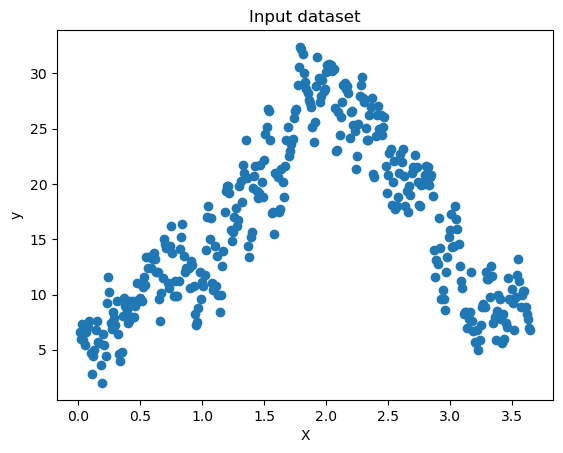

In [65]:
# Look at one year of temperature data over time.

plt.scatter(x=index['index'], y=df_subset['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [66]:
# Find minimum temperature. (Note gradient descent is not actually finding this number)

df_subset['MADRID_temp_mean'].min()

2.0

In [67]:
# Find maximum temperature.

df_subset['MADRID_temp_mean'].max()

32.4

### 5. Compute loss and gradient descent function for Madrid in 2019.

In [68]:
# Compute the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [69]:
compute_cost(X,y)

array([159.17741096])

In [70]:
# Compute gradient descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [74]:
%%time

# Run data through a gradient descent for the starting conditions in 'theta_init.'

num_iterations=200 
theta_init=np.array([[.5],[.5]]) # Guess for [theta0], [theta1].
alpha=0.01 # Step size of 0.01.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 147 ms, sys: 2.54 ms, total: 149 ms
Wall time: 149 ms


In [75]:
theta

array([[6.58219033],
       [4.41159457]])

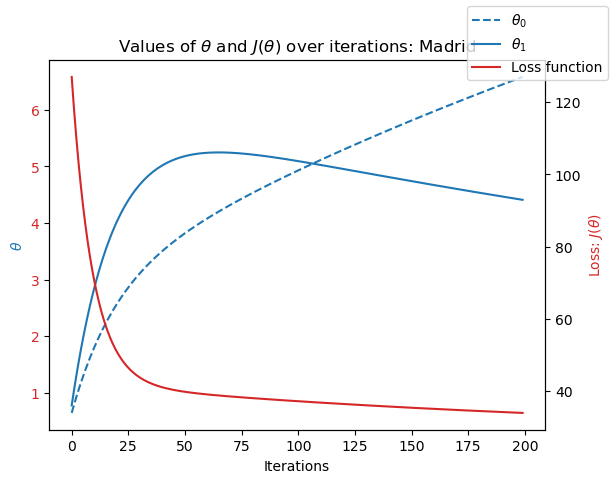

In [76]:
# Plot the loss, theta0, and theta1.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color);

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations: Madrid')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show()

In [77]:
%%time
# theta range
theta0_vals = np.linspace(-125,125,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-125,125,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.1 s, sys: 40.8 ms, total: 2.14 s
Wall time: 2.12 s


In [78]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas: Madrid', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [79]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 6. Compute loss and gradient descent for Roma in 1960.

In [80]:
# Create subset dataframe for 1961 weather data.

df_subset1 = df.loc[df["DATE"].dt.year == 1961]
df_subset1

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
366 1961-01-01      1                  8               2.1            0.97   
367 1961-01-02      1                  8               2.1            0.88   
368 1961-01-03      1                  8               2.1            0.78   
369 1961-01-04      1                  7               2.1            0.70   
370 1961-01-05      1                  7               2.1            0.88   
..         ...    ...                ...               ...             ...   
726 1961-12-27     12                  8               2.1            1.00   
727 1961-12-28     12                  8               2.1            1.00   
728 1961-12-29     12                  2               2.1            0.95   
729 1961-12-30     12                  7               2.1            0.92   
730 1961-12-31     12                  7               2.1            0.77   

     BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
366           1.018                    0.18                 0.21   
367           1.018                    0.18                 0.16   
368           1.018                    0.18                 0.38   
369           1.018                    0.34                 0.26   
370           1.018                    0.27                 0.00   
..              ...                     ...                  ...   
726           1.018                    0.18                 0.00   
727           1.018                    0.18                 0.00   
728           1.018                    0.55                 0.00   
729           1.018                    0.35                 0.00   
730           1.018                    0.51                 0.38   

     BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
366                 0             0.0  ...                     7   
367                 0             0.0  ...                     7   
368                 0             0.0  ...                     7   
369                 0             0.8  ...                     5   
370                 0             0.3  ...                     7   
..                ...             ...  ...                   ...   
726                 1             0.0  ...                     0   
727                 1             0.0  ...                     5   
728                 1             4.0  ...                     7   
729                 1             1.0  ...                     6   
730                 0             3.1  ...                     3   

     VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
366               0.80             1.0003                       0.17   
367               0.77             0.9881                       0.19   
368               0.78             0.9868                       0.38   
369               0.84             1.0073                       0.49   
370               0.84             1.0071                       0.21   
..                 ...                ...                        ...   
726               0.76             1.0083                       0.49   
727               0.82             1.0030                       0.33   
728               0.66             0.9944                       0.23   
729               0.70             0.9989                       0.42   
730               0.79             1.0073                       0.36   

     VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
366                    0.42                    0                0.0   
367                    0.84                    0                0.4   
368                    0.39                    0                2.3   
369                    0.14                    0                5.6   
370                    1.11                    0                0.9   
..                      ...                  ...                ...   
726                    0.00                    0                5.9   
727   

In [81]:
# Check descriptive statistics for 1961 temperatures.

df_subset1.describe()

DATE       MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
count                  365  365.000000         365.000000      3.650000e+02   
mean   1961-07-02 00:00:00    6.526027           5.109589      2.100000e+00   
min    1961-01-01 00:00:00    1.000000           0.000000      2.100000e+00   
25%    1961-04-02 00:00:00    4.000000           3.000000      2.100000e+00   
50%    1961-07-02 00:00:00    7.000000           5.000000      2.100000e+00   
75%    1961-10-01 00:00:00   10.000000           7.000000      2.100000e+00   
max    1961-12-31 00:00:00   12.000000           8.000000      2.100000e+00   
std                    NaN    3.452584           2.540667      1.378566e-14   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count      365.000000    3.650000e+02              365.000000   
mean         0.795671    1.018000e+00                1.449644   
min          0.530000    1.018000e+00                0.170000   
25%          0.730000    1.018000e+00                0.570000   
50%          0.790000    1.018000e+00                1.340000   
75%          0.870000    1.018000e+00                2.120000   
max          1.000000    1.018000e+00                3.550000   
std          0.098214    8.226928e-15                0.958333   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
count           365.000000        365.000000      365.000000  ...   
mean              0.200603          0.021918        5.086027  ...   
min               0.000000          0.000000        0.000000  ...   
25%               0.000000          0.000000        0.800000  ...   
50%               0.000000          0.000000        4.500000  ...   
75%               0.220000          0.000000        8.700000  ...   
max               2.620000          2.000000       14.400000  ...   
std               0.407895          0.164289        4.305344  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
count            365.000000         365.000000         365.000000   
mean               5.936986           0.822932           1.013707   
min                0.000000           0.610000           0.984600   
25%                5.000000           0.780000           1.005900   
50%                6.000000           0.820000           1.014800   
75%                7.000000           0.880000           1.022600   
max                8.000000           0.970000           1.037300   
std                1.733280           0.072910           0.011191   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
count                 365.000000              365.000000           365.000000   
mean                    1.228301                0.376110             0.002740   
min                     0.120000                0.000000             0.000000   
25%                     0.430000                0.000000             0.000000   
50%                     0.910000                0.090000             0.000000   
75%                     1.950000                0.460000             0.000000   
max                     3.650000                4.720000             1.000000   
std                     0.949745                0.671355             0.052342   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
count         365.000000          365.000000         365.000000   
mean            3.651233           10.848767           8.106301   
min             0.000000           -1.300000          -5.300000   
25%             0.200000            8.800000           5.800000   
50%             2.400000           10.900000           8.300000   
75%             6.300000           13.400000          10.500000   
max            14.600000           18.900000          16.700000   
std             3.848866            3.236711           3.540331   

       VALENTIA_temp_max  
count         365.000000  
mean           13.559452  
min             1.200000  
25%            11.200000  
50%        

In [83]:
n_rows1 = df_subset1.shape[0]
n_rows1

365

In [84]:
# Translate Roma weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows1,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows1,1))
X = np.concatenate((ones, X), axis=1)
y =df_subset1['ROMA_temp_mean'].to_numpy().reshape(n_rows1,1)

In [85]:
X.shape, y.shape

((365, 2), (365, 1))

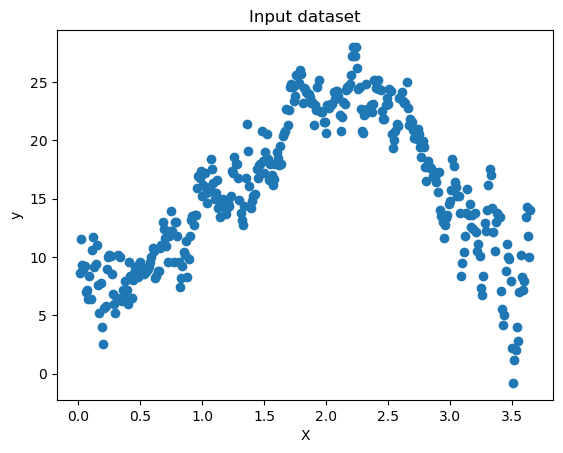

In [87]:
# Look at one year of temperature data over time.

plt.scatter(x=index['index'], y=df_subset1['ROMA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [88]:
# Compute the loss function for the gradient descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [89]:
# Compute gradient descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [90]:
%%time

# Run data through a gradient descent for the starting conditions in 'theta_init.'

num_iterations=20 
theta_init=np.array([[1.3],[0.01]]) # Guess for [theta0], [theta1].
alpha=0.1 # Step size of 0.1.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 25.7 ms, sys: 1.54 ms, total: 27.2 ms
Wall time: 26.1 ms


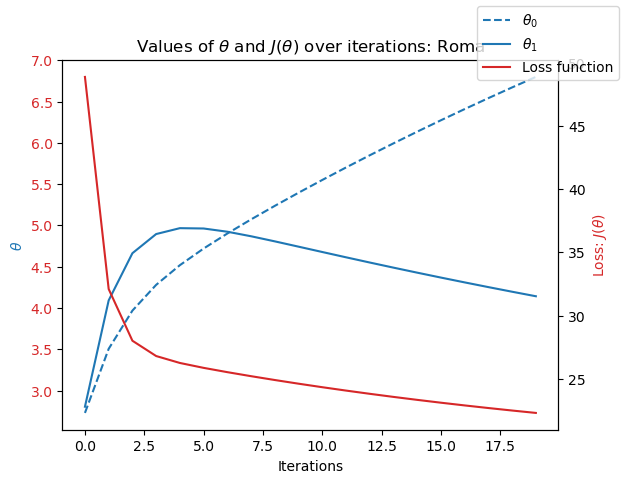

In [91]:
# Plot the loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color);

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations: Roma')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show()

In [92]:
%%time
# theta range
theta0_vals = np.linspace(-50,50,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-50,50,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.09 s, sys: 38.2 ms, total: 2.13 s
Wall time: 2.11 s


In [93]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas: Roma', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 7. Compute loss and gradient descent for Ljubljana in 2009.

In [94]:
# Create subset dataframe for 2009 weather data.

df_subset2 = df.loc[df["DATE"].dt.year == 2009]
df_subset2

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
17898 2009-01-01      1                  4               1.8            0.84   
17899 2009-01-02      1                  8               2.2            0.89   
17900 2009-01-03      1                  5               2.9            0.72   
17901 2009-01-04      1                  4               1.4            0.75   
17902 2009-01-05      1                  8               0.9            0.84   
...          ...    ...                ...               ...             ...   
18258 2009-12-27     12                  7               1.9            0.80   
18259 2009-12-28     12                  7               2.3            0.82   
18260 2009-12-29     12                  7               3.7            0.92   
18261 2009-12-30     12                  8               2.2            0.92   
18262 2009-12-31     12                  7               2.3            0.93   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
17898          1.0284                    0.63                 0.00   
17899          1.0262                    0.18                 0.00   
17900          1.0263                    0.50                 0.00   
17901          1.0239                    0.62                 0.00   
17902          1.0197                    0.28                 0.05   
...               ...                     ...                  ...   
18258          1.0118                    0.37                 0.18   
18259          1.0084                    0.28                 0.42   
18260          1.0028                    0.22                 1.68   
18261          0.9979                    0.18                 1.54   
18262          0.9958                    0.17                 0.57   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
17898                 0             7.1  ...                     7   
17899                 0             0.0  ...                     5   
17900                 0             2.9  ...                     5   
17901                 0             5.4  ...                     7   
17902                 0             0.0  ...                     5   
...                 ...             ...  ...                   ...   
18258                 0             2.3  ...                     4   
18259                 0             0.3  ...                     8   
18260                 0             0.2  ...                     8   
18261                 0             0.0  ...                     8   
18262                 0             0.1  ...                     6   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
17898               0.68             1.0233                       0.38   
17899               0.70             1.0256                       0.26   
17900               0.72             1.0278                       0.31   
17901               0.81             1.0235                       0.16   
17902               0.80             1.0222                       0.25   
...                  ...                ...                        ...   
18258               0.72             1.0039                       0.37   
18259               0.70             0.9975                       0.22   
18260               0.88             0.9866                       0.12   
18261               0.87             0.9862                       0.12   
18262               0.80             1.0029                       0.21   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
17898                    0.00                    0                1.0   
17899                    0.00                    0                0.9   
17900                    0.00                    0                1.3   
17901                    0.45                    0                0.0   
17902                    0.00                    0                0.6   
...                       ...             

In [95]:
# Check descriptive statistics for 2009 temperatures.

df_subset2.describe()

DATE       MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
count                  365  365.000000         365.000000        365.000000   
mean   2009-07-02 00:00:00    6.526027           5.531507          2.270959   
min    2009-01-01 00:00:00    1.000000           0.000000          0.900000   
25%    2009-04-02 00:00:00    4.000000           4.000000          1.500000   
50%    2009-07-02 00:00:00    7.000000           6.000000          2.000000   
75%    2009-10-01 00:00:00   10.000000           7.000000          2.800000   
max    2009-12-31 00:00:00   12.000000           8.000000          8.600000   
std                    NaN    3.452584           2.186929          1.079367   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count      365.000000      365.000000              365.000000   
mean         0.734740        1.016425                1.369096   
min          0.470000        0.987500                0.120000   
25%          0.670000        1.012600                0.550000   
50%          0.730000        1.017200                1.190000   
75%          0.810000        1.021700                2.180000   
max          0.930000        1.035000                3.500000   
std          0.098412        0.008105                0.935221   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
count           365.000000        365.000000      365.000000  ...   
mean              0.209589          0.147945        4.604384  ...   
min               0.000000          0.000000        0.000000  ...   
25%               0.000000          0.000000        0.600000  ...   
50%               0.000000          0.000000        3.600000  ...   
75%               0.210000          0.000000        7.800000  ...   
max               3.740000          7.000000       14.800000  ...   
std               0.461826          0.667147        4.195914  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
count            365.000000         365.000000         365.000000   
mean               5.794521           0.815507           1.011910   
min                1.000000           0.450000           0.974300   
25%                5.000000           0.760000           1.002600   
50%                6.000000           0.830000           1.012500   
75%                7.000000           0.870000           1.021900   
max                8.000000           0.990000           1.038600   
std                1.648833           0.082102           0.013055   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
count                 365.000000              365.000000           365.000000   
mean                    1.131781                0.597753             0.002740   
min                     0.120000                0.000000             0.000000   
25%                     0.420000                0.020000             0.000000   
50%                     0.890000                0.240000             0.000000   
75%                     1.780000                0.840000             0.000000   
max                     3.350000                5.180000             1.000000   
std                     0.829997                0.845762             0.052342   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
count         365.000000          365.000000         365.000000   
mean            3.623288           11.109863           8.548493   
min             0.000000            1.300000          -3.600000   
25%             0.200000            8.900000           6.200000   
50%             2.300000           11.200000           8.600000   
75%             5.800000           14.200000          12.100000   
max            15.400000           19.500000          17.200000   
std             3.736989            3.746854           4.003917   

       VALENTIA_temp_max  
count         365.000000  
mean           13.584932  
min             0.000000  
25%            11.100000  
50%        

In [97]:
n_rows2 = df_subset2.shape[0]
n_rows2

365

In [98]:
# Translate Ljubljana weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows2,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows2,1))
X = np.concatenate((ones, X), axis=1)
y =df_subset2['LJUBLJANA_temp_mean'].to_numpy().reshape(n_rows2,1)

In [99]:
X.shape, y.shape

((365, 2), (365, 1))

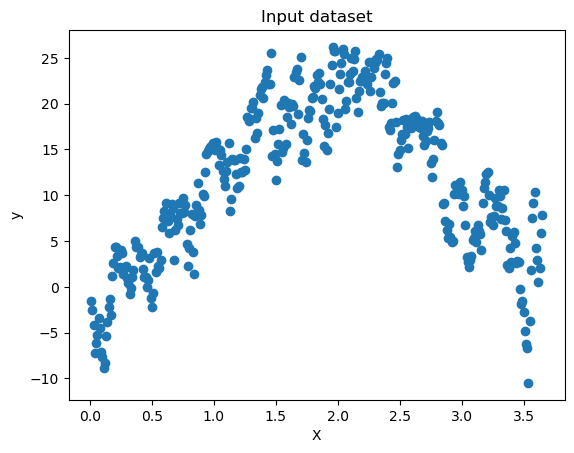

In [100]:
# Look at one year of temperature data over time.

plt.scatter(x=index['index'], y=df_subset2['LJUBLJANA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [101]:
# Compute the loss function for the gradient descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [102]:
# Compute gradient descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [103]:
%%time

# Run data through a gradient descent for the starting conditions in 'theta_init.'

num_iterations=12
theta_init=np.array([[1.1],[0.01]]) # Guess for [theta0], [theta1].
alpha=0.1 # Step size of 0.1.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 7.72 ms, sys: 324 µs, total: 8.05 ms
Wall time: 7.75 ms


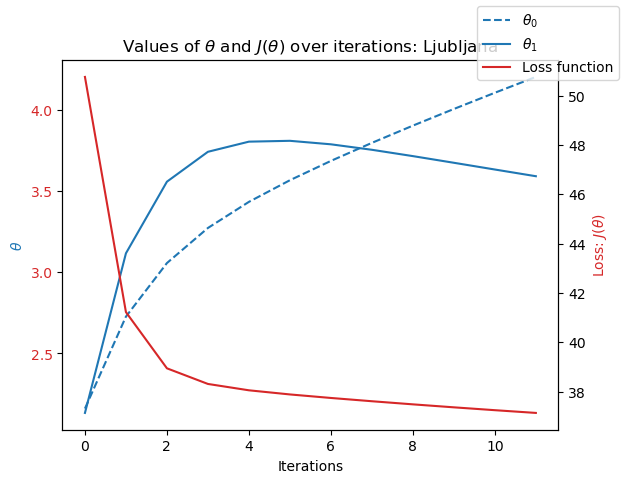

In [104]:
# Plot the loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color);

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations: Ljubljana')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show()

In [105]:
%%time
# theta range
theta0_vals = np.linspace(-60,60,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-60,60,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.1 s, sys: 43.8 ms, total: 2.14 s
Wall time: 2.12 s


In [106]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas: Roma', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 8. Plot visualizations for all weather stations in 1961 and 2009.

In [119]:
# Plot ALL weather data for all stations for 1961.

#X = weather station
#Y = day of the year
#Z = temperature

# You can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=df_subset1.values)])
fig.update_layout(title='Temperatures over time in 1961', autosize=False,
                  width=600, height=600)
fig.show()

In [117]:
# Plot ALL weather data for all stations for 2009.

#X = weather station
#Y = day of the year
#Z = temperature

# You can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=df_subset2.values)])
fig.update_layout(title='Temperatures over time in 2009', autosize=False,
                  width=600, height=600)
fig.show()